In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Zadanie 
Sprawdź czy wzrost zębów zależy pozostałych zmiennych <tt>supp</tt>, <tt>dose</tt>? 

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')
df = data
df.head(10)

len supp  dose
0   4.2   VC   0.5
1  11.5   VC   0.5
2   7.3   VC   0.5
3   5.8   VC   0.5
4   6.4   VC   0.5
5  10.0   VC   0.5
6  11.2   VC   0.5
7  11.2   VC   0.5
8   5.2   VC   0.5
9   7.0   VC   0.5

In [6]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [7]:
formula = 'len ~ C(supp)*C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [4]:
df.dose.unique()

array([0.5, 1. , 2. ])

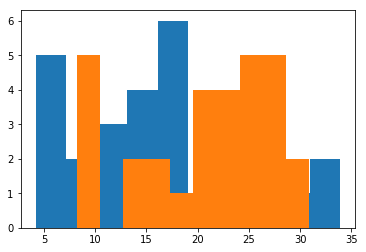

In [8]:
data1=df.len[df.supp=='VC']
data2=df.len[df.supp=='OJ']
(W,p) = stats.levene(data1, data2)
p
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data1)
plt.hist(data2)
plt.show()

In [9]:
data1=df.len[df.dose==0.5]
data2=df.len[df.dose==1.]
data3=df.len[df.dose==2.]
(W,p) = stats.levene(data1, data2, data3)
p

0.5280694573759905

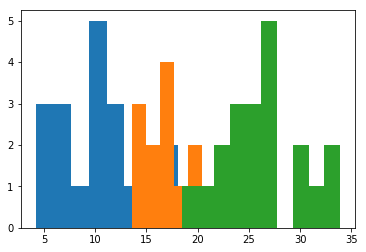

In [10]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data1)
plt.hist(data2)
plt.hist(data3)
plt.show()

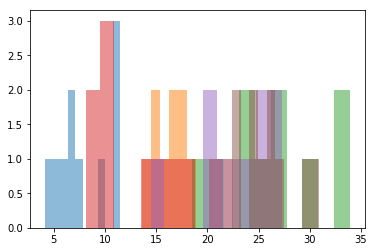

In [24]:
data1=df.len[(df.dose==0.5) & (df.supp=='VC')]
data2=df.len[(df.dose==1.) & (df.supp=='VC')]
data3=df.len[(df.dose==2.) & (df.supp=='VC')]
data4=df.len[(df.dose==0.5) & (df.supp=='OJ')]
data5=df.len[(df.dose==1.) & (df.supp=='OJ')]
data6=df.len[(df.dose==2.) & (df.supp=='OJ')]


plt.hist(data1, alpha=0.5)
plt.hist(data2, alpha=0.5)
plt.hist(data3, alpha=0.5)
plt.hist(data4, alpha=0.5)
plt.hist(data5, alpha=0.5)
plt.hist(data6, alpha=0.5)
plt.show()

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN
